<a href="https://colab.research.google.com/github/s-prak/FMML_Projects_and_Labs/blob/main/Copy_of_Module_01_Lab_02_MLPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [ ]:
 dataset =  datasets.fetch_california_housing()
#print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
#print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(int) # so that we can classify
 #np.int is depreciated as it was written earlier  dataset.target = dataset.target.astype(np.int)
 # target is the variable that you are predicting
 print(dataset.data.shape)
 # data is the features or inputs
 print(dataset.target.shape)

(20640, 8)
(20640,)


Here is a function for calculating the 1-nearest neighbours

In [ ]:
#NN1
a=np.array([[1,2,3],[2,3,4],[3,4,5]])
print(a)
# a is like traindata
# columns are the features
# rows are the different train datasets

In [ ]:
#NN1
q=np.array([0,0,1])
diffa= a-q
print(diffa)
#q is like the query
# query is substracted from every row of the traindataset

[[1 2 2]
 [2 3 3]
 [3 4 4]]


In [ ]:
#NN1
sqa=diffa*diffa
print(sqa)
#point wise multiplication, multiply each corresponding elements with same indices in the two matrices

[[ 1  4  4]
 [ 4  9  9]
 [ 9 16 16]]


In [ ]:
#NN1
dista=sqa.sum(1)
print(dista)
# this is adding up all the features of each dataset
'''
sum(0)- vertical addition
sum(1)- horizontal addition
'''

[ 9 22 41]


'\nsum(0)- vertical addition\nsum(1)- horizontal addition\n'

In [ ]:
#NN1
print(np.argmin(dista))
#np.argmin(dista)- returns the index of the least distance
#trainlabel[np.argmin(dista)]- it will give the trainlabel set with least distance

0


In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel
  # predlabel is the predicted label for each i in testdata, it is assigned the trainlabel of the nearest neighbor

We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  #rng is used to generate random integers
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [ ]:
a=np.array([1,2,3,4])
b=np.array([2,2,3,6])
corr=(a==b).sum()
print(corr)

2


In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  '''
  In Python, the assert keyword is used for debugging purposes and to perform sanity checks in your code. It is often used to check whether a given condition is True. If the condition is False, it raises an AssertionError exception, indicating that something unexpected has occurred in your program.

The basic syntax of the assert statement is as follows:

python
Copy code
assert condition, message
condition is the expression or condition that you want to test. If it evaluates to False, an AssertionError is raised.

message is an optional argument that allows you to provide a custom error message that will be displayed if the assert statement fails.

'''
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  # when the corresponding indices are equal
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [ ]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  # whatever rows has true for split value
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label
  #this method randomly splits the data and label into 2 groups

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

In [ ]:
traindata, trainlabel, valdata, vallabel=split(alltraindata,alltrainlabel,0.1/100)
valpred=NN(traindata,trainlabel,valdata)
valAccuracy=Accuracy(vallabel,valpred)
print(valAccuracy)

0.2718281657666404


In [ ]:
traindata, trainlabel, valdata, vallabel=split(alltraindata,alltrainlabel,99.9/100)
valpred=NN(traindata,trainlabel,valdata)
valAccuracy=Accuracy(vallabel,valpred)
print(valAccuracy)

0.2727272727272727


a1 even if we increase the percentage of validation set or reduce it, the accuracy remains the same for nearest neighbors

In [ ]:
traindata, trainlabel, valdata, vallabel=split(alltraindata,alltrainlabel,60/100)
valpred=RandomClassifier(traindata,trainlabel,valdata)
valAccuracy=Accuracy(vallabel,valpred)
print(valAccuracy)

0.16399506781750925


In [ ]:
traindata, trainlabel, valdata, vallabel=split(alltraindata,alltrainlabel,75/100)
valpred=RandomClassifier(traindata,trainlabel,valdata)
valAccuracy=Accuracy(vallabel,valpred)
print(valAccuracy)

0.16964504283965728


If we increase the traindata percentage in RandomClassifier, then the accuracy also increases

If the size of validation and train data increases, the accuracy also increases

I think a 20% reserve for validation set would be good enough

The effect of changing the percentage of the validation set on the accuracy of models like k-Nearest Neighbors (k-NN) and a Random Classifier (a random guesser) will differ:

**1. k-Nearest Neighbors (k-NN):**

   - **Increasing the Percentage of Validation Set:**
     - **Pros:** A larger validation set for k-NN can provide a more representative sample of the test data. This can lead to a more accurate assessment of the model's performance. As you increase the validation set size, the validation accuracy tends to become more reliable.
     - **Cons:** With a larger validation set, the available data for training the k-NN model decreases. k-NN relies on the local neighborhood of data points, so a smaller training set might lead to a less effective model. However, it can still be beneficial if the increase in validation set size outweighs the decrease in training set size.

   - **Decreasing the Percentage of Validation Set:**
     - **Pros:** A smaller validation set for k-NN means a larger training set. This can be advantageous if you have limited data. With more training data, k-NN might be able to capture more complex relationships in the data.
     - **Cons:** A smaller validation set may lead to a less reliable estimate of your model's performance. k-NN is sensitive to the choice of hyperparameters (e.g., the number of neighbors, distance metrics), and with a small validation set, you might not be able to tune these hyperparameters effectively.

**2. Random Classifier:**

   - **Increasing the Percentage of Validation Set:**
     - **Pros:** With a larger validation set, the accuracy of a random classifier is likely to decrease. A larger validation set makes it less likely for the random classifier to "get lucky" and predict some samples correctly. This provides a more accurate assessment of the model's lack of predictive power.
     - **Cons:** There are no real drawbacks to increasing the validation set size for a random classifier. It simply makes the evaluation more reliable by decreasing the chance of random guessing leading to high accuracy.

   - **Decreasing the Percentage of Validation Set:**
     - **Pros:** A smaller validation set for a random classifier can lead to a higher accuracy by chance. With fewer samples to evaluate, the classifier might occasionally predict some samples correctly, resulting in artificially high accuracy. However, this does not reflect the classifier's actual ability to learn from the data.
     - **Cons:** The main drawback is that a small validation set provides a misleadingly high accuracy score, making it challenging to assess the model's true performance.

In summary, for k-Nearest Neighbors, increasing the validation set size generally leads to more reliable evaluation but reduces the training data available. For a Random Classifier, increasing the validation set size is beneficial because it makes the evaluation more reliable by reducing the chance of random guessing leading to high accuracy. Conversely, decreasing the validation set size can lead to misleadingly high accuracy for a Random Classifier but may not significantly impact k-NN if you have a sufficiently large dataset. The choice depends on your specific goals and constraints.

k-Nearest Neighbors (k-NN):

Increasing the percentage of the validation set: No.

Decreasing the percentage of the validation set: No.


Random Classifier:

Increasing the percentage of the validation set: No.

Decreasing the percentage of the validation set: Yes.

a3.
A common rule of thumb is to reserve about 20% to 30% of your data for the validation set to balance the trade-off between having a sufficiently large validation set for reliable evaluation and a reasonably sized training set for effective model learning.

a2. The size of the training and validation sets can impact your ability to predict test set accuracy using the validation set. A larger training set often improves predictive accuracy, while a larger validation set enhances the reliability of predictions. Striking a balanced split is crucial, and the ideal balance depends on your dataset and model complexity.

ValueError: ignored

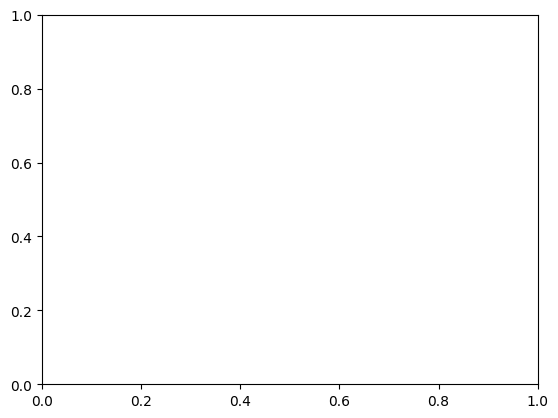

In [ ]:
yp1=Accuracy(vallabel,valpred)
x = np.linspace(0, 1, 100)
plt.plot(x,yp1)
plt.show()

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [ ]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies
  # so everytime we run the nn code, it gives a different accuracy, the average of all the accuracies is considered

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 60, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3395358809054555
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


a1. yes

a2. same accuracy

a3. accuracy decreases, yes a better estimate

a4. no i dont think so, since the subsets of data will just get repeated, there will not be more use, it will be an overhead